In [10]:
from langchain_community.vectorstores import FAISS
from langchain_core.documents import Document
from langchain_text_splitters import CharacterTextSplitter
from langchain_openai import OpenAIEmbeddings

with open('sample4.txt', 'r') as file:
    text_content = file.read()

# Разделение текста на сегменты
text_splitter = CharacterTextSplitter(chunk_size=100, chunk_overlap=20)
texts = text_splitter.split_text(text_content)

# Эксперименты RAG инфраструктуры Langchain

### Documents_Loader

In [79]:
import bs4
import re
from langchain_community.document_loaders import WebBaseLoader

#URL
'''
Загрузка информации происходит по конкретному url на одну статью
Ориентированно на загрузку с статей --- https://struchkov.dev/blog/ru/tag/java/
и --- https://proglang.su/java/classes-and-objects
'''

#PROLANG

prolang_tuple = ("https://proglang.su/java",
                 "https://proglang.su/java/introduction-to-programming",
                 "https://proglang.su/java/installation-and-configuration-on-a-pc",
                 "https://proglang.su/java/syntax",
                 "https://proglang.su/java/classes-and-objects",
                 "https://proglang.su/java/constructors",
                 "https://proglang.su/java/datatypes-and-literals",
                 "https://proglang.su/java/variable-types",
                 "https://proglang.su/java/modifiers",
                 "https://proglang.su/java/operators",
                 "https://proglang.su/java/loops-and-loop-operators",
                 "https://proglang.su/java/loop-while",
                 "https://proglang.su/java/loop-for",
                 "https://proglang.su/java/improved-loop-for",
                 "https://proglang.su/java/loop-do-while",
                 "https://proglang.su/java/operator-break",
                 "https://proglang.su/java/operator-continue",
                 "https://proglang.su/java/decision-making-operators",
                 "https://proglang.su/java/operator-if",
                 "https://proglang.su/java/operator-if-else",
                 "https://proglang.su/java/embedded-operator-if",
                 "https://proglang.su/java/operator-switch-case",
                 "https://proglang.su/java/conditional-operator",
                 "https://proglang.su/java/numbers",
                 "https://proglang.su/java/numbers-xxxvalue",
                 "https://proglang.su/java/numbers-compareto",
                 "https://proglang.su/java/numbers-equals",
                 "https://proglang.su/java/numbers-valueof",
                 "https://proglang.su/java/numbers-tostring",
                 "https://proglang.su/java/numbers-parseint",
                 "https://proglang.su/java/numbers-abs",
                 "https://proglang.su/java/numbers-ceil",
                 "https://proglang.su/java/numbers-floor",
                 "https://proglang.su/java/numbers-rint",
                 "https://proglang.su/java/numbers-round",
                 "https://proglang.su/java/numbers-min",
                 "https://proglang.su/java/numbers-max",
                 "https://proglang.su/java/numbers-exp",
                 "https://proglang.su/java/numbers-log",
                 "https://proglang.su/java/numbers-pow",
                 "https://proglang.su/java/numbers-sqrt",
                 "https://proglang.su/java/numbers-sin",
                 "https://proglang.su/java/numbers-cos",
                 "https://proglang.su/java/numbers-tan",
                 "https://proglang.su/java/numbers-asin",
                 "https://proglang.su/java/numbers-acos",
                 "https://proglang.su/java/numbers-atan",
                 "https://proglang.su/java/numbers-atan2",
                 "https://proglang.su/java/numbers-todegrees",
                 "https://proglang.su/java/numbers-toradians",
                 "https://proglang.su/java/numbers-random",
                 "https://proglang.su/java/characters",
                 "https://proglang.su/java/characters-isletter",
                 "https://proglang.su/java/characters-isdigit",
                 "https://proglang.su/java/characters-iswhitespace",
                 "https://proglang.su/java/characters-isuppercase",
                 "https://proglang.su/java/characters-islowercase",
                 "https://proglang.su/java/characters-touppercase",
                 "https://proglang.su/java/characters-tolowercase",
                 "https://proglang.su/java/characters-tostring",
                 "https://proglang.su/java/strings",
                 "https://proglang.su/java/strings-charat",
                 "https://proglang.su/java/strings-compareto",
                 "https://proglang.su/java/strings-comparetoignorecase",
                 "https://proglang.su/java/strings-concat",
                 "https://proglang.su/java/strings-contentequals",
                 "https://proglang.su/java/strings-copyvalueof",
                 "https://proglang.su/java/strings-endswith",
                 "https://proglang.su/java/strings-equals",
                 "https://proglang.su/java/strings-equalsignorecase",
                 "https://proglang.su/java/strings-getbytes",
                 "https://proglang.su/java/strings-getchars",
                 "https://proglang.su/java/strings-hashcode",
                 "https://proglang.su/java/strings-indexof",
                 "https://proglang.su/java/strings-intern",
                 "https://proglang.su/java/strings-lastindexof",
                 "https://proglang.su/java/strings-length",
                 "https://proglang.su/java/strings-matches",
                 "https://proglang.su/java/strings-regionmatches",
                 "https://proglang.su/java/strings-replace",
                 "https://proglang.su/java/strings-replaceall",
                 "https://proglang.su/java/strings-replacefirst",
                 "https://proglang.su/java/strings-split",
                 "https://proglang.su/java/strings-startswith",
                 "https://proglang.su/java/strings-subsequence",
                 "https://proglang.su/java/strings-substring",
                 "https://proglang.su/java/strings-tochararray",
                 "https://proglang.su/java/strings-tolowercase",
                 "https://proglang.su/java/strings-tostring",
                 "https://proglang.su/java/strings-touppercase",
                 "https://proglang.su/java/strings-trim",
                 "https://proglang.su/java/strings-valueof",
                 "https://proglang.su/java/strings-stringbuilder-stringbuffer",
                 "https://proglang.su/java/strings-stringbuilder-stringbuffer-reverse",
                 "https://proglang.su/java/strings-stringbuilder-stringbuffer-delete",
                 "https://proglang.su/java/strings-stringbuilder-stringbuffer-insert",
                 "https://proglang.su/java/strings-stringbuilder-stringbuffer-replace",
                 "https://proglang.su/java/arrays",
                 "https://proglang.su/java/date-and-time",
                 "https://proglang.su/java/regular-expressions",
                 "https://proglang.su/java/methods",
                 "https://proglang.su/java/io-and-files-and-directories",
                 "https://proglang.su/java/io-and-files-and-directories-bytearrayinputstream",
                 "https://proglang.su/java/io-and-files-and-directories-datainputstream",
                 "https://proglang.su/java/io-and-files-and-directories-bytearrayoutputstream",
                 "https://proglang.su/java/io-and-files-and-directories-dataoutputstream",
                 "https://proglang.su/java/io-and-files-and-directories-file-class",
                 "https://proglang.su/java/io-and-files-and-directories-filereader-class",
                 "https://proglang.su/java/io-and-files-and-directories-filewriter-class",
                 "https://proglang.su/java/exceptions",
                 "https://proglang.su/java/exceptions-built-in-exceptions",
                 "https://proglang.su/java/inner-classes",
                 "https://proglang.su/java/inheritance",
                 "https://proglang.su/java/overriding",
                 "https://proglang.su/java/polymorphism",
                 "https://proglang.su/java/abstraction",
                 "https://proglang.su/java/encapsulation",
                 "https://proglang.su/java/packages",
                 "https://proglang.su/java/data-structures",
                 "https://proglang.su/java/enumeration-interface",
                 "https://proglang.su/java/bitset-class",
                 "https://proglang.su/java/vector-class",
                 "https://proglang.su/java/stack-class",
                 "https://proglang.su/java/dictionary-class",
                 "https://proglang.su/java/hashtable-class",
                 "https://proglang.su/java/properties-class",
                 "https://proglang.su/java/collections",
                 "https://proglang.su/java/collection-interface",
                 "https://proglang.su/java/list-interface",
                 "https://proglang.su/java/set-interface",
                 "https://proglang.su/java/sortedset-interface",
                 "https://proglang.su/java/map-interface",
                 "https://proglang.su/java/mapentry-interface",
                 "https://proglang.su/java/sortedmap-interface",
                 "https://proglang.su/java/linkedlist-class",
                 "https://proglang.su/java/arraylist-class",
                 "https://proglang.su/java/hashset-class",
                 "https://proglang.su/java/linkedhashset-class",
                 "https://proglang.su/java/treeset-class",
                 "https://proglang.su/java/hashmap-class",
                 "https://proglang.su/java/treemap-class",
                 "https://proglang.su/java/weakhashmap-class",
                 "https://proglang.su/java/linkedhashmap-class",
                 "https://proglang.su/java/identityhashmap-class",
                 "https://proglang.su/java/collection-algorithms",
                 "https://proglang.su/java/iterator-and-listiterator",
                 "https://proglang.su/java/comparator",
                 "https://proglang.su/java/generics",
                 "https://proglang.su/java/serialization",
                 "https://proglang.su/java/networking",
                 "https://proglang.su/java/url-processing",
                 "https://proglang.su/java/sending-email",
                 "https://proglang.su/java/multithreading",
                 "https://proglang.su/java/thread-synchronization",
                 "https://proglang.su/java/thread-communication",
                 "https://proglang.su/java/thread-deadlock",
                 "https://proglang.su/java/thread-control",
                 "https://proglang.su/java/applet-basics",
                 "https://proglang.su/java/documentation")

pr_class_pattern_header = re.compile(r'breadcrumbs.*')
pr_class_pattern_body = re.compile(r'lesson.*')
pr_classes = (pr_class_pattern_header, pr_class_pattern_body)

#STRUCHKOV

struchkov_tuple = ("https://struchkov.dev/blog/ru/threads-in-java-thread-and-runnable/",
                   "https://struchkov.dev/blog/ru/introduction-to-multithreading/",
                   "https://struchkov.dev/blog/ru/lambda-expression-java/",
                   "https://struchkov.dev/blog/ru/websocket-quarkus/",
                   "https://struchkov.dev/blog/ru/java-stream-api/",
                   "https://struchkov.dev/blog/ru/memory-in-java/",
                   "https://struchkov.dev/blog/ru/difference-stringbuilder-stringbuffer/",
                   "https://struchkov.dev/blog/ru/create-spring-boot-starter/",
                   "https://struchkov.dev/blog/ru/release-releases-with-maven/",
                   "https://struchkov.dev/blog/ru/build-docker-image-for-spring-boot/",
                   "https://struchkov.dev/blog/ru/pagination-in-springboot/",
                   "https://struchkov.dev/blog/ru/transactional-isolation-levels/",
                   "https://struchkov.dev/blog/ru/transactional-isolation-levels/",
                   "https://struchkov.dev/blog/ru/transaction-jdbc-and-spring-boot/",
                   "https://struchkov.dev/blog/ru/modifiers-in-java/",
                   "https://struchkov.dev/blog/ru/panache-with-kafka-consumer-quarkus/",
                   "https://struchkov.dev/blog/ru/exception-handling-controlleradvice/",
                   "https://struchkov.dev/blog/ru/hibernate-multiple-bag-fetch-exception/",
                   "https://struchkov.dev/blog/ru/hibernates-statelesssession/")

st_class_pattern_header = re.compile(r'post-title.*')
st_class_pattern_body = re.compile(r'post-body.*')
struchkov_classes = (st_class_pattern_header, st_class_pattern_body)



def url_parser(parse_clases, urls):
    bs4_strainer = bs4.SoupStrainer(class_=parse_clases)

    loader = WebBaseLoader(
        web_paths=urls,
        bs_kwargs={"parse_only": bs4_strainer},
    )
    docs = loader.load()
    return docs


prolang_docs = url_parser(pr_classes, prolang_tuple)
struchkov_docs = url_parser(struchkov_classes, struchkov_tuple)


print(f"Prolang: {len(prolang_docs)}, Struchkov: {len(struchkov_docs)}" )

Prolang: 159, Struchkov: 19


In [82]:
print(prolang_docs[9])


page_content='




Главная




Java


10. Java – Операторы

10. Java – Основные операторы языка










Java предоставляет богатый набор операторов для управления переменными. Все операторы Java можно разделить на следующие группы:
арифметические операторы;
операторы сравнения;
побитовые операторы;
логические операторы;
операторы присваивания;
прочие операторы.
Арифметические операторы
Арифметические операторы – используются в математических выражениях таким же образом, как они используются в алгебре. Предположим, целая переменная A равна 10, а переменная B равна 20. В следующей таблице перечислены арифметические операторы в Java:

ОператорОписаниеПример
+Складывает значения по обе стороны от оператораA + B даст 30
-Вычитает правый операнд из левого операндаA - B даст -10
*Умножает значения по обе стороны от оператораA * B даст 200
/Оператор деления делит левый операнд на правый операндB / A даст 2
%Делит левый операнд на правый операнд и возвращает остатокB % A даст 0
++Инкремент - 

### Documents_Splitter


In [ ]:
# Разбиение по статьям


# Разбиение по чанкам


# Разбиение по чанкам + метатеги


# Переработка текста с помощью GPT и только потом сохранение

### Documents_DataBase

In [ ]:
# Сделать чистый датасет - аля вопрос ответ

### Retriver

### Эксперимент по работе RAG

In [ ]:
# Создание векторного хранилища
vectorstore = FAISS.from_texts(texts, embedding=OpenAIEmbeddings(api_key=''))

# Настройка извлечения
retriever = vectorstore.as_retriever(search_kwargs={"k": 1})  # Извлечение одного наиболее релевантного документа

# Пример запроса
query = "занимался"
docs = retriever.invoke(query)

In [16]:
docs

[Document(metadata={}, page_content='Депозитарий – это, можно сказать, участник фондового рынка ценных бумаг.\nВ депозитарии учитываются права владения ценными бумагами.\nИ, то есть, начисляются дивиденды, купоны и все, что с этим связано.\nВот, получается, мы из этой команды предлагаю по такому плану пройти сейчас,\nрасскажешь нам немножко о себе, но потом подзадаем какие-то вопросы общие, технические.\nХорошо. Так, меня слышно?\nХорошо слышно.\nХорошо.\nJava начал заниматься чуть более трех лет назад.\nКак только начал заниматься, я практически сразу нашел проект, на который меня взяли.\nНу, меня взяли в аутсорсинговую компанию.\nТо есть, я как бы работал на одну компанию, но по факту работал на другую.\nИ там я занимался внутренним документооборотом.\nСтэк технологии, которые я там использовал, был такой устаревший немного.\nТам Oracle использовался.\nНасколько я общался, просто сейчас Oracle практически никогда не используется.\nПоэтому так, что там мы, то есть Spring не использова

# Развитие графа Q&A + RAG + Agents

In [1]:
from langchain_core.messages import HumanMessage
from langgraph.graph import END, MessageGraph
import time
def add_one(input: list[HumanMessage]):
    input[0].content = input[0].content + "a"
    time.sleep(1)
    return input


graph = MessageGraph()

graph.add_node("branch_a", add_one)
graph.add_edge("branch_a", "branch_b")
graph.add_edge("branch_a", "branch_c")

graph.add_node("branch_b", add_one)
graph.add_node("branch_c", add_one)

graph.add_edge("branch_b", "final_node")
graph.add_edge("branch_c", "final_node")

graph.add_node("final_node", add_one)
graph.add_edge("final_node", END)

graph.set_entry_point("branch_a")

runnable = graph.compile()


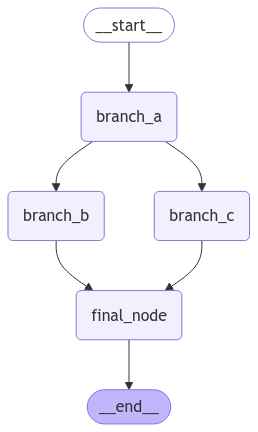

In [2]:
from IPython.display import Image, display

display(Image(runnable.get_graph().draw_mermaid_png()))

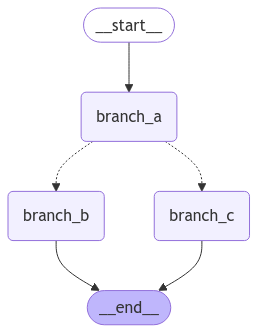

In [3]:
from langchain_core.messages import HumanMessage
from langgraph.graph import END, MessageGraph


def entry(input: list[HumanMessage]):
    return input


def work_with_b(input: list[HumanMessage]):
    print("Using branch B")
    return input


def work_with_c(input: list[HumanMessage]):
    print("Using branch C")
    return input


def router(input: list[HumanMessage]):
    if "use_b" in input[0].content:
        return "branch_b"
    else:
        return "branch_c"


graph = MessageGraph()

graph.add_node("branch_a", entry)
graph.add_node("branch_b", work_with_b)
graph.add_node("branch_c", work_with_c)

graph.add_conditional_edges(
    "branch_a", router, {"branch_b": "branch_b", "branch_c": "branch_c"}
)
graph.add_edge("branch_b", END)
graph.add_edge("branch_c", END)

graph.set_entry_point("branch_a")

runnable = graph.compile()
display(Image(runnable.get_graph().draw_mermaid_png()))

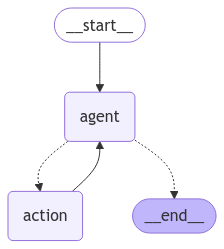

In [5]:
from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage
from langgraph.graph import END, MessageGraph



def entry(input: list[HumanMessage]):
    return input


def action(input: list[HumanMessage]):
    print("Action taken:", [msg.content for msg in input])
    if len(input) > 5:
        input.append(HumanMessage(content="end"))
    else:
        input.append(HumanMessage(content="continue"))
    return input


def should_continue(input: list):
    last_message = input[-1]
    if "end" in last_message.content:
        return "__end__"
    return "action"


graph = MessageGraph()

graph.add_node("agent", entry)
graph.add_node("action", action)

graph.add_conditional_edges(
    "agent", should_continue, {"action": "action", "__end__": END}
)
graph.add_edge("action", "agent")

graph.set_entry_point("agent")

runnable = graph.compile()
display(Image(runnable.get_graph().draw_mermaid_png()))

In [ ]:
from typing import TypedDict, Sequence
from langchain_core.messages import BaseMessage, HumanMessage, SystemMessage
from langchain_openai import ChatOpenAI
from langchain_core.tools import tool
from langchain_core.messages import ToolMessage
from langgraph.graph import StateGraph, END

llm = ChatOpenAI(
    model="gpt-4o",
    api_key='',
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
    openai_proxy=''
)

# Определяем состояние агента
class AgentState(TypedDict):
    messages: Sequence[BaseMessage]
    category: str
    api_call_count: int

In [ ]:
###################################
# ТУЛЗЫ
###################################
@tool
def educ_plane_api(city: str) -> str:
    """Возвращает информацию об образовательных планах в указанном городе."""
    return f"Weather in {city}: Sunny, 22°C"


@tool
def presentation_api(query: str) -> str:
    """Возвращает актуальную информацию о стоимости акций."""
    return "AAPL stock price is 150 USD"


# Интегрируем инструменты с моделью
llm_with_tools = llm.bind_tools([educ_plane_api, presentation_api])

tool_mapping = {
    "educ_plane_api": educ_plane_api,
    "presentation_api": presentation_api
}


In [ ]:
prompt = SystemMessage(content=(
        '''Классифицируй обращения пользователя в подходящую категорию.
        Категории:
        {'presentation' : 'Пользователь просит создать презентацию',
        'leasson_create' : 'Пользователь просит дополнить пункты плана обучения учебным материалом',
        'general' : 'Остальное'}
        В ответе укажи только категорию, ключ.'''
    ))
#user_msg = 'представь что ты учитель биологии, скажи сколько живут летучие мыши. и составь план обучения пот этой теме алаллалалала а лучше нет не составляй я сам составлю только ответь на вопрос'
user_msg = ''
query = HumanMessage(content=user_msg)

response = llm.invoke([prompt, query])

response.content

'general'

In [ ]:
###################################
# ФУНКЦИИ ДЛЯ ВЫЗОВОВ В ГРАФЕ
###################################

def call_classifier(state: AgentState):
    """
    Узел классификации:
    Использует LLM для классификации последнего запроса пользователя на категории: weather, finance или general.
    """
    messages = state["messages"]
    user_msg = messages[-1].content

    prompt = SystemMessage(content=(
            '''Классифицируй обращения пользователя в подходящую категорию.
            Категории:
            {'presentation' : 'Пользователь просит создать презентацию',
            'leasson_create' : 'Пользователь просит дополнить пункты плана обучения учебным материалом',
            'general' : 'Остальное'}
            В ответе укажи только категорию, ключ.'''
        ))
    query = HumanMessage(content=user_msg)

    response = llm.invoke([prompt, query])
    category = response.content.strip().lower()
    if category not in ["presentation", "leasson_create"]:
        category = "general"

    return {"messages": state["messages"], "category": category, "api_call_count": state["api_call_count"]}

def route_by_category(state: AgentState):
    """
    Функция для определения следующего шага в зависимости от категории.
    """
    category = state["category"]
    if category == "presentation":
        return "presentation_agent"
    elif category == "leasson_create":
        return "leasson_create_agent"
    else:
        return "general_agent"

def call_presentation_agent(state: AgentState):
    """
    Узел для обработки запросов на создание презентации.

    Агент попробует вызвать ...
    """
    messages = state["messages"]
    user_query = messages[-1].content

    # Извлекаем город (на примере — упрощенная логика)
    #city = "Munich" if "munich" in user_query.lower() else "Unknown city"
    
    # Вызываем инструмент
    #tool_output = presentation_api.invoke({"city": city})
    state["api_call_count"] += 1
    
    # Возвращаем ToolMessage
    return {
        "messages": [ToolMessage(content='Презентации')],#[ToolMessage(content=tool_output)],
        "api_call_count": state["api_call_count"]
    }

def call_leasson_create_agent(state: AgentState):
    """
    Узел для обработки дополнения учебного плана.
    """
    messages = state["messages"]
    user_query = messages[-1].content
    
    # Простой вызов
    #tool_output = educ_plane_api.invoke({"query": user_query})
    state["api_call_count"] += 1

    return {
        "messages": [ToolMessage(content='Урок')],#[ToolMessage(content=tool_output)],
        "api_call_count": state["api_call_count"]
    }

def call_general_agent(state: AgentState):
    """
    Узел для обработки 'общих' запросов, без специализированных инструментов.
    Здесь просто дергаем модель для ответа.
    """
    messages = state["messages"]
    response = llm.invoke(messages)
    return {
        "messages": [response],
        "api_call_count": state["api_call_count"]}

In [15]:
system_prompt = ''
human_prompt = '''Основы Java:

Изучение синтаксиса Java.
Понимание концепций объектно-ориентированного программирования (ООП): классы, объекты, наследование, полиморфизм, инкапсуляция.
Работа с основными типами данных и коллекциями.
Структуры данных и алгоритмы:

Изучение основных структур данных: массивы, списки, стеки, очереди, деревья (включая красно-черные деревья)[1].
Основные алгоритмы сортировки и поиска.
Многопоточность:

Понимание процессов и потоков, различия между ними.
Создание потоков в Java, использование интерфейса Runnable и класса Thread.
Работа с синхронизацией и проблемами многопоточности.
Исключения:

Понимание иерархии исключений в Java.
Работа с конструкциями try-catch-finally и обработка исключений.
Java Collections Framework:

Изучение коллекций Java: List, Set, Map и их реализаций.
Понимание различий между различными типами коллекций и их использования.
Java IO и NIO:

Работа с потоками ввода-вывода.
Использование новых возможностей NIO для работы с файлами и сетями.
Основы работы с базами данных:

JDBC и работа с реляционными базами данных.
Основы SQL.
Spring Framework:

Основы Spring и его компонентов: Spring Core, Spring MVC, Spring Boot.
Работа с аннотациями и конфигурацией Spring.
Паттерны проектирования:

Изучение основных паттернов проектирования, таких как Singleton, Factory, Builder[5].
Понимание принципов SOLID.
Современные технологии и инструменты:

REST и GraphQL для создания веб-сервисов.
Использование Maven или Gradle для управления зависимостями.
Основы работы с системами контроля версий, такими как Git.'''

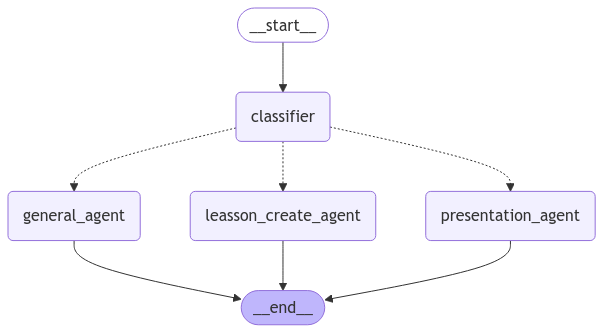

In [105]:
###################################
# ПОСТРОЕНИЕ ГРАФА
###################################

workflow = StateGraph(AgentState)

# Добавляем узлы
workflow.add_node("classifier", call_classifier)
workflow.add_node("leasson_create_agent", call_leasson_create_agent)
workflow.add_node("presentation_agent", call_presentation_agent)
workflow.add_node("general_agent", call_general_agent)

# Начинаем с классификатора
workflow.set_entry_point("classifier")

# Добавляем ветвление в зависимости от категории
workflow.add_conditional_edges(
    "classifier",
    route_by_category,
    {
        "leasson_create_agent": "leasson_create_agent",
        "presentation_agent": "presentation_agent",
        "general_agent": "general_agent"
    }
)

workflow.add_edge("leasson_create_agent", END)
workflow.add_edge("presentation_agent", END)
workflow.add_edge("general_agent", END)

app = workflow.compile()

display(Image(app.get_graph().draw_mermaid_png()))

In [106]:
system_message = SystemMessage(content="Ты ассистент помошник")
user_message = HumanMessage(content="Дополни план обучения")
initial_state = {"messages": [system_message, user_message], "api_call_count": 0, "category": ""}

result = app.invoke(initial_state)
print("Final answer:", result["messages"][-1].content)
print("Category:", result["category"])
print("API calls:", result["api_call_count"])

KeyError: 'tool_call_id'

In [ ]:
# -*- coding: utf-8 -*-
"""
ООП-реализация агента с использованием графа для обработки различных категорий запросов.
"""

from typing import Sequence, Dict, Any
from typing_extensions import TypedDict
import uuid
import logging

# Импортируем необходимые компоненты из фреймворка
from langchain.schema import BaseMessage, HumanMessage, SystemMessage
from langgraph.pregel import (
    StateGraph,
    AgentState as LangAgentState,
    ToolMessage,
    END
)
from langgraph.tools import tool  # Предполагается, что @tool декоратор доступен

# Настройка логирования
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

###################################
# ОПРЕДЕЛЕНИЕ СТАНДАРТНЫХ КЛАССОВ
###################################

class AgentState(TypedDict):
    messages: Sequence[BaseMessage]
    category: str
    api_call_count: int

###################################
# ОПРЕДЕЛЕНИЕ ИНСТРУМЕНТОВ
###################################

@tool
def educ_plane_api(query: str) -> str:
    """Возвращает информацию об образовательных планах."""
    # Здесь должна быть реализация реального API
    return f"Дополнение плана обучения: {query}"

@tool
def presentation_api(query: str) -> str:
    """Создает презентацию по запросу."""
    # Здесь должна быть реализация реального API
    return f"Презентация по теме: {query}"

# Интеграция инструментов с моделью
# Предполагается, что 'llm' определен ранее и поддерживает bind_tools
# llm_with_tools = llm.bind_tools([educ_plane_api, presentation_api])

###################################
# ОПРЕДЕЛЕНИЕ БАЗОВОГО КЛАССА АГЕНТА
###################################

class Agent:
    def __init__(self, name: str):
        self.name = name

    def execute(self, state: AgentState) -> Dict[str, Any]:
        raise NotImplementedError("Каждый агент должен реализовывать метод execute.")

###################################
# КОНКРЕТНЫЕ АГЕНТЫ
###################################

class ClassifierAgent(Agent):
    def __init__(self):
        super().__init__(name="classifier")

    def execute(self, state: AgentState) -> Dict[str, Any]:
        messages = state["messages"]
        user_msg = messages[-1].content

        prompt = SystemMessage(content=(
            '''Классифицируй обращения пользователя в подходящую категорию.
            Категории:
            {'presentation' : 'Пользователь просит создать презентацию',
            'leasson_create' : 'Пользователь просит дополнить пункты плана обучения учебным материалом',
            'general' : 'Остальное'}
            В ответе укажи только категорию, ключ.'''
        ))
        query = HumanMessage(content=user_msg)

        # Вызов модели LLM для классификации
        response = llm.invoke([prompt, query])
        category = response.content.strip().lower()
        if category not in ["presentation", "leasson_create"]:
            category = "general"

        logger.info(f"Classifier determined category: {category}")

        return {
            "messages": state["messages"],  # Сохраняем существующие сообщения
            "category": category,
            "api_call_count": state["api_call_count"]
        }

class PresentationAgent(Agent):
    def __init__(self):
        super().__init__(name="presentation_agent")

    def execute(self, state: AgentState) -> Dict[str, Any]:
        try:
            user_query = state["messages"][-1].content
            logger.info(f"User query for presentation: {user_query}")

            # Генерация уникального идентификатора вызова инструмента
            tool_call_id = str(uuid.uuid4())
            logger.info(f"Generated tool_call_id: {tool_call_id}")

            # Вызов инструмента для создания презентации
            tool_output = presentation_api(user_query)
            state["api_call_count"] += 1
            logger.info(f"Tool output: {tool_output}")

            # Создание объекта ToolMessage с необходимыми полями
            tool_message = ToolMessage(
                content=tool_output,
                tool_call_id=tool_call_id,
                tool_name="presentation_api",
                tool_input=user_query
            )
            logger.info(f"Created ToolMessage: {tool_message}")

            return {
                "messages": [tool_message],
                "category": state["category"],
                "api_call_count": state["api_call_count"]
            }
        except Exception as e:
            logger.error(f"Error in PresentationAgent: {e}")
            return {
                "messages": [HumanMessage(content="Произошла ошибка при создании презентации.")],
                "category": state["category"],
                "api_call_count": state["api_call_count"]
            }

class LessonCreateAgent(Agent):
    def __init__(self):
        super().__init__(name="leasson_create_agent")

    def execute(self, state: AgentState) -> Dict[str, Any]:
        try:
            user_query = state["messages"][-1].content
            logger.info(f"User query for lesson creation: {user_query}")

            # Генерация уникального идентификатора вызова инструмента
            tool_call_id = str(uuid.uuid4())
            logger.info(f"Generated tool_call_id: {tool_call_id}")

            # Вызов инструмента для дополнения учебного плана
            tool_output = educ_plane_api(user_query)
            state["api_call_count"] += 1
            logger.info(f"Tool output: {tool_output}")

            # Создание объекта ToolMessage с необходимыми полями
            tool_message = ToolMessage(
                content=tool_output,
                tool_call_id=tool_call_id,
                tool_name="educ_plane_api",
                tool_input=user_query
            )
            logger.info(f"Created ToolMessage: {tool_message}")

            return {
                "messages": [tool_message],
                "category": state["category"],
                "api_call_count": state["api_call_count"]
            }
        except Exception as e:
            logger.error(f"Error in LessonCreateAgent: {e}")
            return {
                "messages": [HumanMessage(content="Произошла ошибка при дополнении плана обучения.")],
                "category": state["category"],
                "api_call_count": state["api_call_count"]
            }

class GeneralAgent(Agent):
    def __init__(self):
        super().__init__(name="general_agent")

    def execute(self, state: AgentState) -> Dict[str, Any]:
        try:
            messages = state["messages"]
            response = llm.invoke(messages)
            logger.info(f"General agent response: {response.content}")
            return {
                "messages": [response],
                "category": state["category"],
                "api_call_count": state["api_call_count"]
            }
        except Exception as e:
            logger.error(f"Error in GeneralAgent: {e}")
            return {
                "messages": [HumanMessage(content="Произошла ошибка при обработке запроса.")],
                "category": state["category"],
                "api_call_count": state["api_call_count"]
            }

###################################
# ОПРЕДЕЛЕНИЕ КЛАССА WORKFLOW
###################################

class Workflow:
    def __init__(self):
        self.graph = StateGraph(AgentState)
        self.agents = {
            "classifier": ClassifierAgent(),
            "presentation_agent": PresentationAgent(),
            "leasson_create_agent": LessonCreateAgent(),
            "general_agent": GeneralAgent()
        }
        self.setup_graph()

    def setup_graph(self):
        # Добавляем узлы в граф
        for name, agent in self.agents.items():
            self.graph.add_node(name, agent.execute)

        # Устанавливаем точку входа
        self.graph.set_entry_point("classifier")

        # Добавляем ветвление в зависимости от категории
        self.graph.add_conditional_edges(
            "classifier",
            self.route_by_category,
            {
                "leasson_create_agent": "leasson_create_agent",
                "presentation_agent": "presentation_agent",
                "general_agent": "general_agent"
            }
        )

        # Добавляем конечные узлы
        self.graph.add_edge("leasson_create_agent", END)
        self.graph.add_edge("presentation_agent", END)
        self.graph.add_edge("general_agent", END)

    def route_by_category(self, state: AgentState) -> str:
        category = state["category"]
        logger.info(f"Routing based on category: {category}")
        if category == "presentation":
            return "presentation_agent"
        elif category == "leasson_create":
            return "leasson_create_agent"
        else:
            return "general_agent"

    def invoke(self, initial_state: AgentState) -> Dict[str, Any]:
        return self.graph.invoke(initial_state)

###################################
# ЗАПУСК ПРИЛОЖЕНИЯ
###################################

if __name__ == "__main__":
    # Инициализация Workflow
    workflow = Workflow()

    # Определение начального состояния
    system_message = SystemMessage(content="Ты ассистент помощник")
    user_message = HumanMessage(content="Дополни план обучения")
    initial_state: AgentState = {
        "messages": [system_message, user_message],
        "api_call_count": 0,
        "category": ""
    }

    # Запуск Workflow
    result = workflow.invoke(initial_state)

    # Вывод результатов
    final_answer = result["messages"][-1].content if result["messages"] else "Нет ответа."
    category = result.get("category", "Не определено")
    api_calls = result.get("api_call_count", 0)

    print("Final answer:", final_answer)
    print("Category:", category)
    print("API calls:", api_calls)
